# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?q="
appid = "&appid="
city_df = []

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# loop thru (cities) and print each name/id
counter = 1

country= []
cityn = []
lats = []
lngs = []
temps = []
max_temps = []
humidities = []
clouds = []
winds = []

for cityname in cities:
    if counter < 500:
        try:
            query_url = url + cityname + appid + weather_api_key
            city_request = requests.get(query_url).json()
            city_name = city_request['name']
            city_lat = city_request['coord']['lat']
            city_long = city_request['coord']['lon']
            city_temp = city_request['main']['temp']
            city_max = city_request['main']['temp_max']
            city_hum = city_request['main']['humidity']
            city_cloud = city_request['clouds']['all']
            city_wind = city_request['wind']['speed']
            # get country info
            country_info = city_request['sys']['country']
            # append city name
            cityn.append(city_name)
            # append country info
            country.append(country_info)
            lats.append(city_lat)
            lngs.append(city_long)
            temps.append(city_temp)
            max_temps.append(city_max)
            humidities.append(city_hum)
            clouds.append(city_cloud)
            winds.append(city_wind)
            print("city name is " + str(city_name) + " and the position is: " + str(counter))
            counter = counter + 1
        except:
            break

city name is Raudeberg and the position is: 1
city name is Puerto Ayora and the position is: 2
city name is Port Hardy and the position is: 3
city name is Mehamn and the position is: 4
city name is Yellowknife and the position is: 5
city name is Nome and the position is: 6
city name is Saint-Joseph and the position is: 7
city name is Los Llanos de Aridane and the position is: 8
city name is Torbay and the position is: 9
city name is Hazaribagh and the position is: 10
city name is Arraial do Cabo and the position is: 11
city name is Dingle and the position is: 12
city name is Jacareacanga and the position is: 13
city name is Port Alfred and the position is: 14
city name is Pittsburg and the position is: 15


In [4]:
lats

[61.9875,
 -0.7393,
 50.6996,
 71.0357,
 62.456,
 64.5011,
 -21.3667,
 28.6585,
 47.6666,
 23.9833,
 -22.9661,
 10.9995,
 -6.2222,
 -33.5906,
 38.028]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# api call template: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#sample call for city yellowknife

#.append not adding
#no .append results in single float point

city_df = []

        

city_df = {
    'country' : country,
           'cityn' : cityn,
    'lats' : lats,
    'lngs' : lngs,
    "temps" : temps,
    'max_temps' : max_temps,
    'humidities' : humidities,
    'clouds' : clouds,
    'winds' : winds
               
} 
city_df





{'country': ['NO',
  'EC',
  'CA',
  'NO',
  'CA',
  'US',
  'RE',
  'ES',
  'CA',
  'IN',
  'BR',
  'PH',
  'BR',
  'ZA',
  'US'],
 'cityn': ['Raudeberg',
  'Puerto Ayora',
  'Port Hardy',
  'Mehamn',
  'Yellowknife',
  'Nome',
  'Saint-Joseph',
  'Los Llanos de Aridane',
  'Torbay',
  'Hazaribagh',
  'Arraial do Cabo',
  'Dingle',
  'Jacareacanga',
  'Port Alfred',
  'Pittsburg'],
 'lats': [61.9875,
  -0.7393,
  50.6996,
  71.0357,
  62.456,
  64.5011,
  -21.3667,
  28.6585,
  47.6666,
  23.9833,
  -22.9661,
  10.9995,
  -6.2222,
  -33.5906,
  38.028],
 'lngs': [5.1352,
  -90.3518,
  -127.4199,
  27.8492,
  -114.3525,
  -165.4064,
  55.6167,
  -17.9182,
  -52.7314,
  85.35,
  -42.0278,
  122.6711,
  -57.7528,
  26.891,
  -121.8847],
 'temps': [278.15,
  299.26,
  278.31,
  266.15,
  240.44,
  256.15,
  300.17,
  293.24,
  269.73,
  291.73,
  303.15,
  296.71,
  303.41,
  293.71,
  281.88],
 'max_temps': [278.15,
  301.15,
  280.15,
  266.15,
  240.93,
  256.15,
  301.15,
  295.15,
  

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#convet to df
cities_df = pd.DataFrame(city_df)

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:


#export to csv 
cities_df.to_csv("../output_data/cities.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

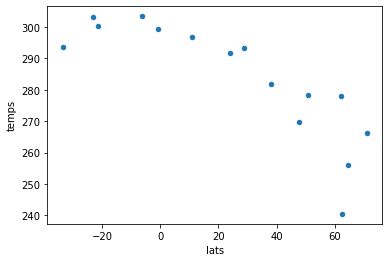

In [11]:
#cities_df["latn"] = np.where(cities_df.lats > 0, cities_df.lats, 0)
#cities_df["latso"] = np.where(cities_df.lats < 0, - cities_df.lats, 0) 


cities_df.plot.scatter(x='lats', y='temps' )
plt.savefig('Lat vs Temp.png')


## Latitude vs. Humidity Plot

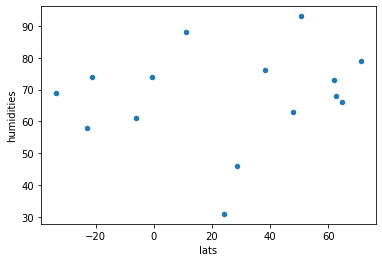

In [13]:
cities_df.plot.scatter(x='lats', y='humidities' )
#AxesSubplot:xlabel='Latitude', ylabel='Humidity'
plt.savefig('Lat vs Humidity.png')    

## Latitude vs. Cloudiness Plot

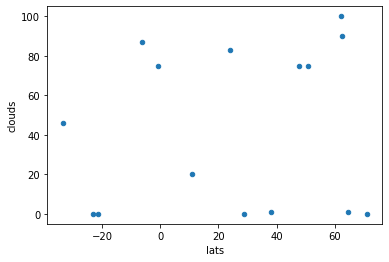

In [14]:
cities_df.plot.scatter(x='lats', y='clouds' )
#AxesSubplot:xlabel='Latitude', ylabel='Cloudiness'
plt.savefig('Lat vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

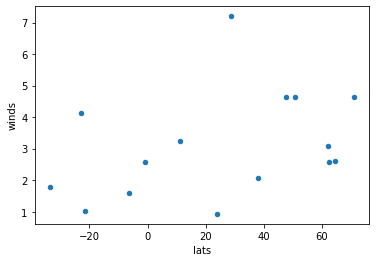

In [15]:
cities_df.plot.scatter(x='lats', y='winds' )
#AxesSubplot:xlabel='Latitude', ylabel='Wind Speed'
plt.savefig('Lat vs Wind Speed.png')

## Linear Regression

In [ ]:
#split northern and southern lats
#north lat = latn
#south lat = latso





####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation coefficient is -0.8202151922543476


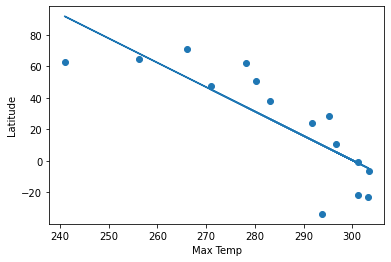

In [16]:
x_value = cities_df['max_temps']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation coefficient is -0.8202151922543476


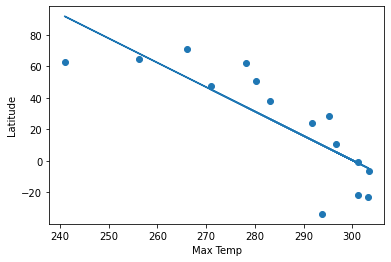

In [17]:
x_value = cities_df['max_temps']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation coefficient is 0.1476960448944462


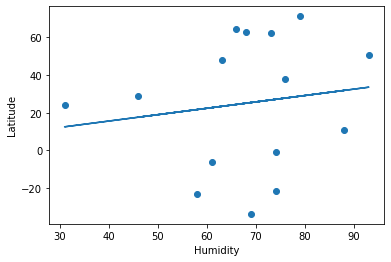

In [18]:
x_value = cities_df['humidities']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation coefficient is 0.1476960448944462


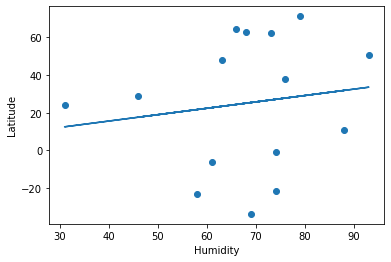

In [19]:
x_value = cities_df['humidities']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation coefficient is 0.14960914643733955


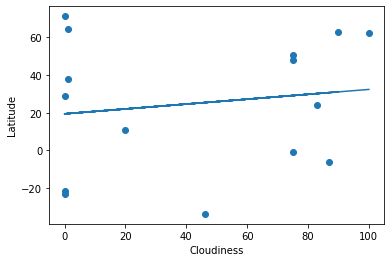

In [20]:
x_value = cities_df['clouds']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation coefficient is 0.14960914643733955


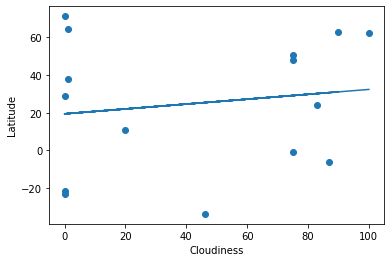

In [21]:
x_value = cities_df['clouds']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation coefficient is 0.34966148036162664


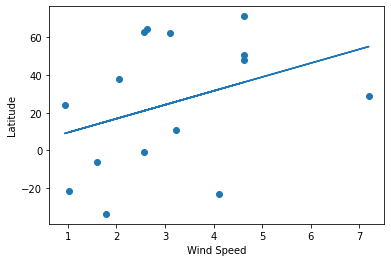

In [22]:
x_value = cities_df['winds']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation coefficient is 0.34966148036162664


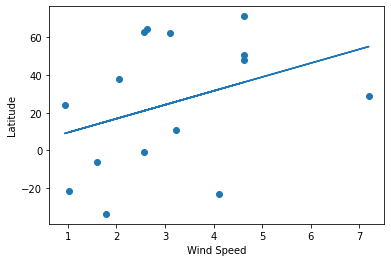

In [23]:
x_value = cities_df['winds']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()